In [1]:
import pandas as pd
import numpy as np

In [2]:
# Read the JSON lines from the text file into a list of dictionaries
with open('result_fast.txt', 'r') as file:
    data = [eval(line) for line in file]

df = pd.DataFrame(data)

In [3]:
df

,n,seed,algorithm,sort_time,Sorted
0,100,0,insertion sort,0.000,1
1,100,1,insertion sort,0.000,1
2,100,2,insertion sort,0.000,1
3,100,3,insertion sort,0.000,1
4,100,4,insertion sort,0.000,1
...,...,...,...,...,...
212,10000,0,stooge sort,96.784,1
213,10000,1,stooge sort,95.914,1
214,10000,2,stooge sort,98.181,1
215,10000,3,stooge sort,100.231,1


In [4]:
df = df.drop(columns='Sorted')
grouped = df.groupby(['algorithm', 'n'])
mean_group = grouped.mean()
mean_group

seed   sort_time
algorithm       n                          
heap sort       100         2.0      0.0000
                1000        2.0      0.0000
                10000       2.0      0.0000
                100000      2.0      0.0082
                1000000     2.0      0.1188
                10000000    2.0      2.1238
                100000000   2.0     36.1700
insertion sort  100         2.0      0.0000
                1000        2.0      0.0000
                10000       2.0      0.0090
                100000      2.0      0.9100
                1000000     2.0     95.7792
                10000000    0.5  12271.3500
merge sort      100         2.0      0.0000
                1000        2.0      0.0000
                10000       2.0      0.0000
                100000      2.0      0.0090
                1000000     2.0      0.1048
                10000000    2.0      1.2190
                100000000   2.0     14.4270
quick sort last 100         2.0      0.0000
                1000        2.0      0.0000
                10000       2.0      0.0000
                100000      2.0      0.0050
                1000000     2.0      0.0660
                10000000    2.0      0.8432
                100000000   2.0      9.2770
quick sort rand 100         2.0      0.0000
                1000        2.0      0.0000
                10000       2.0      0.0000
                100000      2.0      0.0060
                1000000     2.0      0.0744
                10000000    2.0      0.8946
                100000000   2.0     10.3666
radix sort      100         2.0      0.0000
                1000        2.0      0.0000
                10000       2.0      0.0000
                100000      2.0      0.0030
                1000000     2.0      0.0410
                10000000    2.0      1.0396
                100000000   2.0      9.9438
stooge sort     100         2.0      0.0000
                1000        2.0      0.1208
                10000       2.0     97.7914

In [79]:
df = df.drop(columns='Sorted')
plot_group = df.groupby(['n', 'algorithm'])
mean_group = grouped.mean()
mean_group

seed   sort_time
algorithm       n                          
heap sort       100         2.0      0.0000
                1000        2.0      0.0000
                10000       2.0      0.0000
                100000      2.0      0.0082
                1000000     2.0      0.1188
                10000000    2.0      2.1238
                100000000   2.0     36.1700
insertion sort  100         2.0      0.0000
                1000        2.0      0.0000
                10000       2.0      0.0090
                100000      2.0      0.9100
                1000000     2.0     95.7792
                10000000    0.5  12271.3500
merge sort      100         2.0      0.0000
                1000        2.0      0.0000
                10000       2.0      0.0000
                100000      2.0      0.0090
                1000000     2.0      0.1048
                10000000    2.0      1.2190
                100000000   2.0     14.4270
quick sort last 100         2.0      0.0000
                1000        2.0      0.0000
                10000       2.0      0.0000
                100000      2.0      0.0050
                1000000     2.0      0.0660
                10000000    2.0      0.8432
                100000000   2.0      9.2770
quick sort rand 100         2.0      0.0000
                1000        2.0      0.0000
                10000       2.0      0.0000
                100000      2.0      0.0060
                1000000     2.0      0.0744
                10000000    2.0      0.8946
                100000000   2.0     10.3666
radix sort      100         2.0      0.0000
                1000        2.0      0.0000
                10000       2.0      0.0000
                100000      2.0      0.0030
                1000000     2.0      0.0410
                10000000    2.0      1.0396
                100000000   2.0      9.9438
stooge sort     100         2.0      0.0000
                1000        2.0      0.1208
                10000       2.0     97.7914

In [6]:
final = mean_group['sort_time'].unstack().T
final

algorithm,heap sort,insertion sort,merge sort,quick sort last,quick sort rand,radix sort,stooge sort
n,,,,,,,
100,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
1000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.1208
10000,0.0000,0.0090,0.0000,0.0000,0.0000,0.0000,97.7914
100000,0.0082,0.9100,0.0090,0.0050,0.0060,0.0030,NaN
1000000,0.1188,95.7792,0.1048,0.0660,0.0744,0.0410,NaN
10000000,2.1238,12271.3500,1.2190,0.8432,0.8946,1.0396,NaN
100000000,36.1700,NaN,14.4270,9.2770,10.3666,9.9438,NaN


In [7]:
final['insertion sort'].iloc[5] = np.nan
final

algorithm,heap sort,insertion sort,merge sort,quick sort last,quick sort rand,radix sort,stooge sort
n,,,,,,,
100,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
1000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.1208
10000,0.0000,0.0090,0.0000,0.0000,0.0000,0.0000,97.7914
100000,0.0082,0.9100,0.0090,0.0050,0.0060,0.0030,NaN
1000000,0.1188,95.7792,0.1048,0.0660,0.0744,0.0410,NaN
10000000,2.1238,NaN,1.2190,0.8432,0.8946,1.0396,NaN
100000000,36.1700,NaN,14.4270,9.2770,10.3666,9.9438,NaN


In [8]:
final.T

n,100,1000,10000,100000,1000000,10000000,100000000
algorithm,,,,,,,
heap sort,0.0,0.0000,0.0000,0.0082,0.1188,2.1238,36.1700
insertion sort,0.0,0.0000,0.0090,0.9100,95.7792,NaN,NaN
merge sort,0.0,0.0000,0.0000,0.0090,0.1048,1.2190,14.4270
quick sort last,0.0,0.0000,0.0000,0.0050,0.0660,0.8432,9.2770
quick sort rand,0.0,0.0000,0.0000,0.0060,0.0744,0.8946,10.3666
radix sort,0.0,0.0000,0.0000,0.0030,0.0410,1.0396,9.9438
stooge sort,0.0,0.1208,97.7914,NaN,NaN,NaN,NaN


<Axes: title={'center': 'All algorithms average sorting time'}, xlabel='n'>

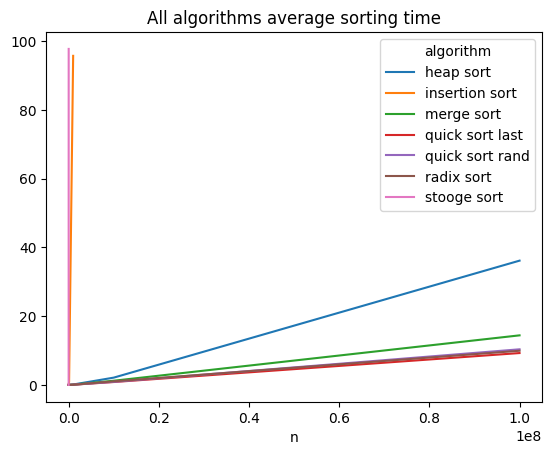

In [145]:
final.plot(title = 'All algorithms average sorting time')

<Axes: title={'center': 'All algorithms in (n: log scale)'}, xlabel='n'>

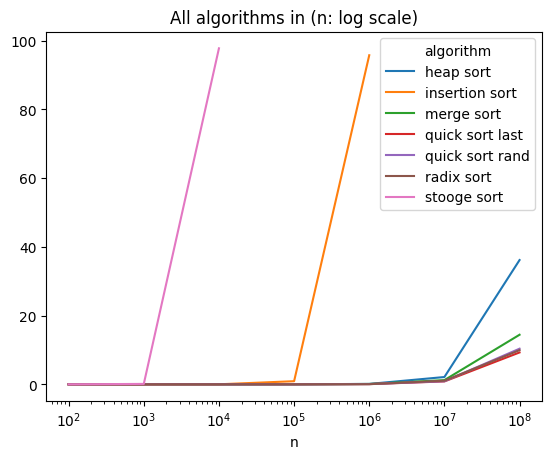

In [160]:
final.plot(logx = True, title = 'All algorithms in (n: log scale)')

<Axes: title={'center': 'All algorithms average sorting time (n: log scale)'}, xlabel='n'>

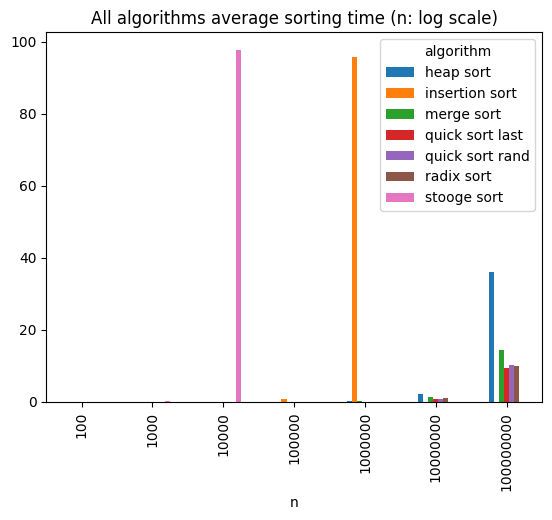

In [156]:
final.plot(kind = 'bar', title = 'All algorithms average sorting time (n: log scale)')

<Axes: title={'center': 'All algorithms average sorting time (n & sorting time: log scale)'}, xlabel='n'>

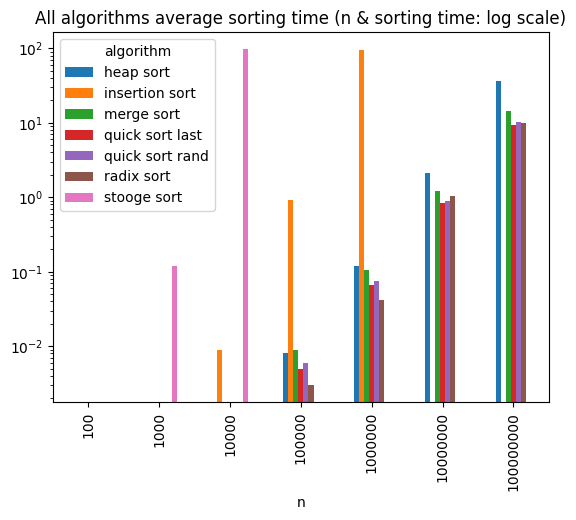

In [157]:
final.plot(kind = 'bar', title = 'All algorithms average sorting time (n & sorting time: log scale)', logy = True)

<Axes: title={'center': 'Fast algorithms in linear scale'}, xlabel='n'>

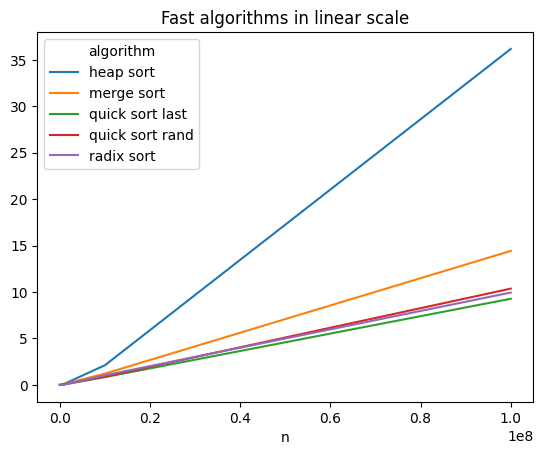

In [123]:
final[['heap sort', 'merge sort', 'quick sort last', 'quick sort rand', 'radix sort']].plot(title = 'Fast algorithms in linear scale')

<Axes: title={'center': 'Fast algorithms in (n:log scale)'}, xlabel='n'>

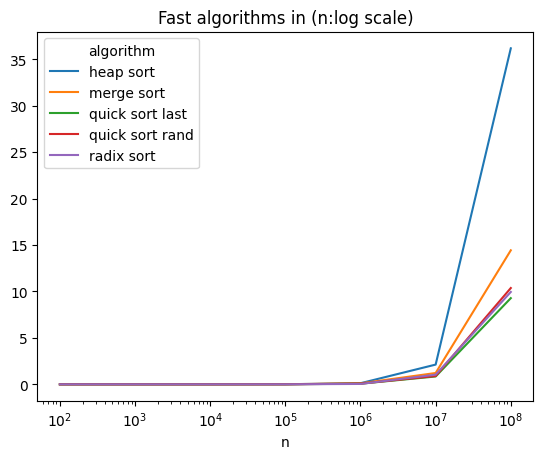

In [162]:
final[['heap sort', 'merge sort', 'quick sort last', 'quick sort rand', 'radix sort']].plot(logx = True, 
                                                                                            title = 'Fast algorithms in (n:log scale)')